In [1]:
require 'image';

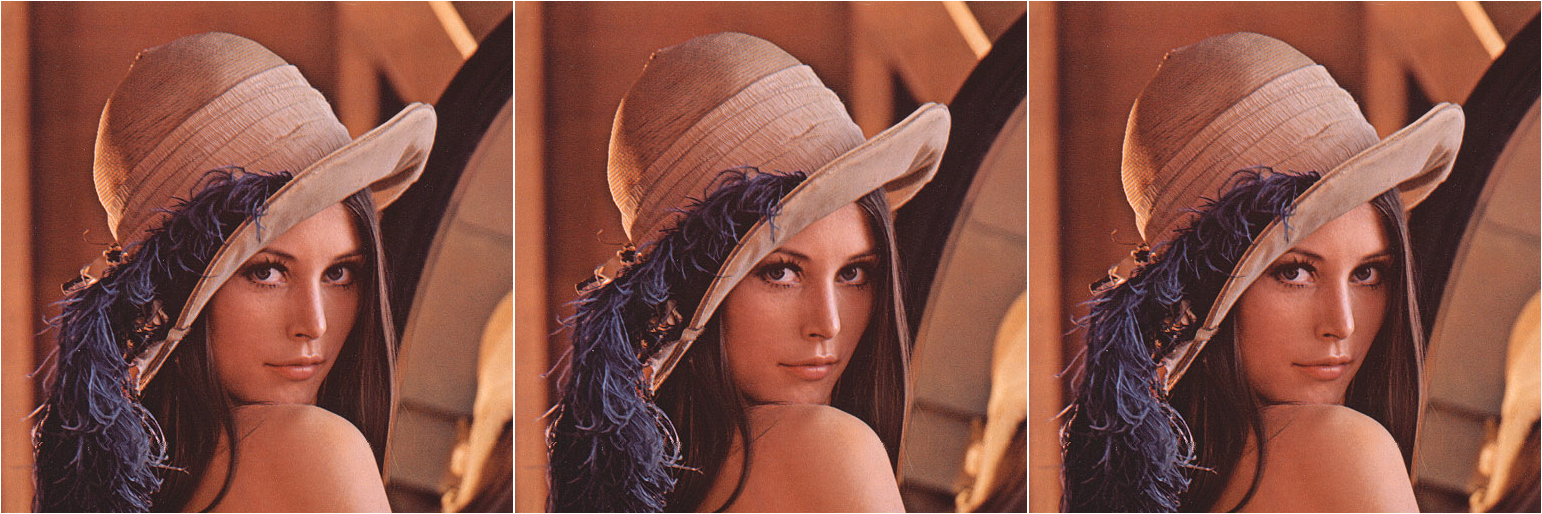

In [2]:
itorch.image({image.lena(), image.lena(), image.lena()})

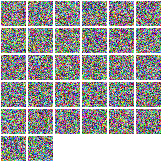

In [3]:
require 'nn'
m=nn.SpatialConvolution(3,32,25,25)
itorch.image(m.weight)

In [4]:
itorch.audio('volkswagen.mp3')
itorch.video('small.mp4')
itorch.html('<p><b>Hi there!</b> this is arbitrary HTML</p>');

/root/torch/install/share/lua/5.1/itorch/gfx.lua:67: File could not be opened: volkswagen.mp3
stack traceback:
	[C]: in function 'assert'
	/root/torch/install/share/lua/5.1/itorch/gfx.lua:67: in function 'audio'
	[string "itorch.audio('volkswagen.mp3')..."]:1: in main chunk
	[C]: in function 'xpcall'
	/root/torch/install/share/lua/5.1/itorch/main.lua:179: in function </root/torch/install/share/lua/5.1/itorch/main.lua:143>
	/root/torch/install/share/lua/5.1/lzmq/poller.lua:75: in function 'poll'
	/root/torch/install/share/lua/5.1/lzmq/impl/loop.lua:307: in function 'poll'
	/root/torch/install/share/lua/5.1/lzmq/impl/loop.lua:325: in function 'sleep_ex'
	/root/torch/install/share/lua/5.1/lzmq/impl/loop.lua:370: in function 'start'
	/root/torch/install/share/lua/5.1/itorch/main.lua:350: in main chunk
	[C]: in function 'require'
	(command line):1: in main chunk
	[C]: at 0x00406670: 

In [5]:
x1 = torch.randn(40):mul(100)
y1 = torch.randn(40):mul(100)
x2 = torch.randn(40):mul(100)
y2 = torch.randn(40):mul(100)
x3 = torch.randn(40):mul(200)
y3 = torch.randn(40):mul(200)

In [6]:
Plot = require 'itorch.Plot'

In [7]:
?torch.cmul

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++	
[res] torch.cmul([res,] tensor1, tensor2)


Element-wise multiplication of tensor1 by tensor2 .
The number of elements must match, but sizes do not matter.
 > x = torch.Tensor(2, 2):fill(2)
> y = torch.Tensor(4):fill(3)
> x:cmul(y)
> = x
 6  6
 6  6
[torch.Tensor of dimension 2x2] 

 z = torch.cmul(x, y) returns a new Tensor .

 torch.cmul(z, x, y) puts the result in z .

 y:cmul(x) multiplies all elements of y with corresponding elements 
of x .

 z:cmul(x, y) puts the result in z .	
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++	



In [8]:
plot = Plot():circle(x1, y1, 'red', 'hi'):circle(x2, y2, 'blue', 'bye'):draw()
plot:circle(x3,y3,'green', 'yolo'):redraw()
plot:title('Scatter Plot Demo'):redraw()
plot:xaxis('length'):yaxis('width'):redraw()
plot:legend(true)
plot:redraw()

In [9]:
-- line plots
plot = Plot():line(x1, y1,'red','example'):legend(true):title('Line Plot Demo'):draw()

In [10]:
-- segment plots
plot = Plot():segment(x1, y1, x1+10,y1+10, 'red','demo'):title('Segment Plot Demo'):draw()

In [11]:
-- quiver plots
xx = torch.linspace(-3,3,10)
yy = torch.linspace(-3,3,10)
local function meshgrid(x,y)
   local xx = torch.repeatTensor(x, y:size(1),1)
   local yy = torch.repeatTensor(y:view(-1,1), 1, x:size(1))
    return xx, yy
end
Y, X = meshgrid(xx, yy)
U = -torch.pow(X,2) + Y -1
V =  X - torch.pow(Y,2) +1
plot = Plot():quiver(U,V,'red','',10):title('Quiver Plot Demo'):draw()

In [12]:
-- quads/rectangles
x1=torch.randn(10)
y1=torch.randn(10)
plot = Plot():quad(x1,y1,x1+1,y1+1,'red',''):draw()

In [13]:
-- histogram
x = torch.rand(10000)
lx = torch.log(x):add(1)
plot = Plot():histogram(x):histogram(lx):title('Histogram of a gaussian draw'):draw()

In [14]:
-- group scatter
x = torch.randn(200); y = torch.randn(200); x:narrow(1, 1, 100):add(2);
labels = torch.LongTensor(200):zero(); labels:add(1); labels:narrow(1, 1, 100):add(1)
itorch.Plot():gscatter(x, y):title('Scatter plot without labels'):draw()
itorch.Plot():gscatter(x, y, labels):title('Scatter plot with labels and legend #1'):legend(true):draw()
itorch.Plot():gscatter(x, y, labels, true):title('Scatter plot with labels and legend #2'):draw()
itorch.Plot():gscatter(x, y, labels, false):title('Scatter plot with labels and no legend'):draw()

In [15]:
-- Text method to plot
local t = torch.Tensor
local y = t(10)
local x = t(y:size()):zero()
local labels = {}
for i = 1, 10 do
    y[i] = i
    labels[i] = tostring(i)
end

itorch.Plot():gscatter(x, y)
  :text(x, y, labels, y, 'black')
  :triangle(x, y, 'blue')
  :draw()

In [16]:
-- hover tool
local t = torch.Tensor
local y = t(10)
local x = t(y:size()):zero()
local labels = {}
for i = 1, 10 do
    y[i] = i
    labels[i] = tostring(i)
end

itorch.Plot()
  :circle(x, y, 'red', nil, {foo=labels})
  :hover_tool({{'xy', '@x @y'}, {'foo', '@foo'}})
  :draw()